# Download Data

In [0]:
!wget http://commachallenge.s3-us-west-2.amazonaws.com/speed_challenge_2017.tar
!tar -xvf /content/speed_challenge_2017.tar
!mkdir data/frames

--2019-03-18 17:12:56--  http://commachallenge.s3-us-west-2.amazonaws.com/speed_challenge_2017.tar
Resolving commachallenge.s3-us-west-2.amazonaws.com (commachallenge.s3-us-west-2.amazonaws.com)... 52.218.245.233
Connecting to commachallenge.s3-us-west-2.amazonaws.com (commachallenge.s3-us-west-2.amazonaws.com)|52.218.245.233|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 197191680 (188M) [application/x-tar]
Saving to: ‘speed_challenge_2017.tar’

speed_challenge_201 100%[===================>] 188.06M  5.42MB/s    in 17s     

2019-03-18 17:13:14 (11.2 MB/s) - ‘speed_challenge_2017.tar’ saved [197191680/197191680]

README
data/
data/train.mp4
data/test.mp4
data/train.txt


# Exploring Data

           0
0  28.105569
1  28.105569
2  28.106527
3  28.130404
4  28.109243
5  28.088572
6  28.034211
7  28.018491
8  27.986624
9  28.016352

Statistics of Speed Distribution
DescribeResult(nobs=20400, minmax=(array([0.]), array([28.130404])), mean=array([12.18318166]), variance=array([67.35095656]), skewness=array([0.17719878]), kurtosis=array([-1.36264429]))


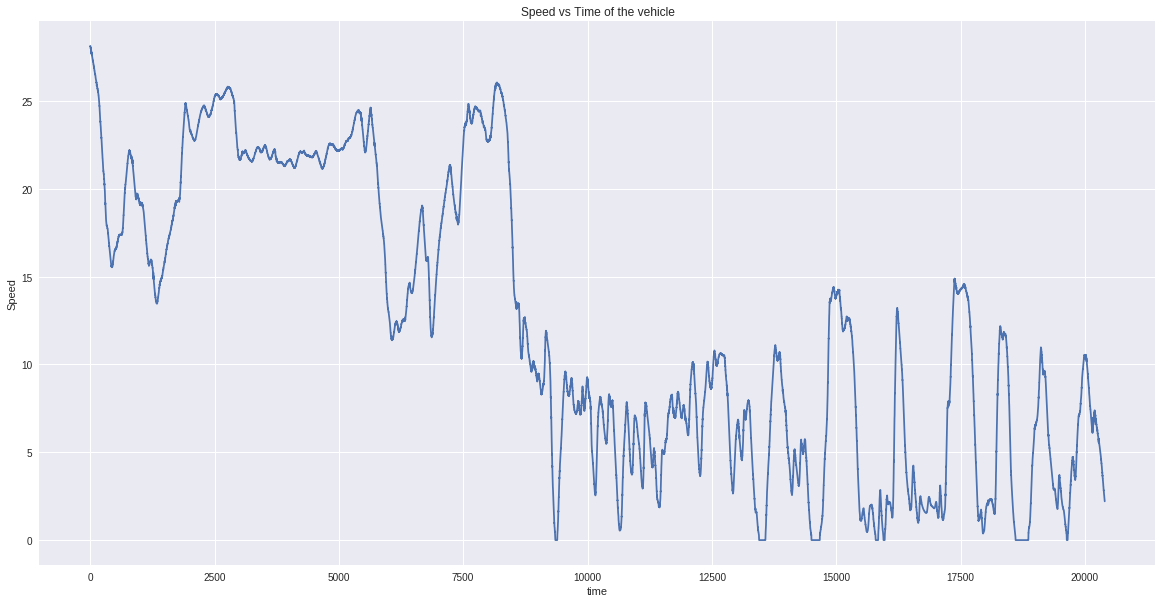


Histogram of speed distribution


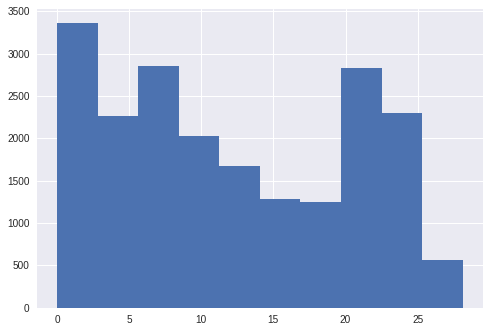

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy

data_df = pd.read_csv('/content/data/train.txt', header=None)
print(data_df.head(10))

speeds = data_df.values

print('\nStatistics of Speed Distribution')
print(scipy.stats.describe(speeds))

plt.figure(figsize=(20,10))
plt.title('Speed vs Time of the vehicle')
plt.plot(speeds)
plt.xlabel('time')
plt.ylabel('Speed')
plt.show()


print("\nHistogram of speed distribution")
plt.hist(speeds)
plt.show()

## Video frames to images

In [0]:
import cv2

vidcap = cv2.VideoCapture('/content/data/train.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
  cv2.imwrite("/content/data/frames/%d.jpg" % count, image)    
  success,image = vidcap.read()
  count += 1

In [0]:
import os 
frames_list = os.listdir('/content/data/frames')
len(frames_list)

20400

In [0]:
# utils
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# get image index with path as input
def get_image_idx(path):
  idx = path.split('/')[4].split('.')[0]
  return int(idx)

# get speed from txt with idx
data_df = pd.read_csv('/content/data/train.txt', header=None)
def get_speed(idx):
  return data_df.iloc[idx][0]
  
def view_img_speed(img_path):
#   img_path = '/content/data/frames/'+frames_list[0]
  print(img_path)
  img = mpimg.imread(img_path)
  print(img.shape)
  plt.text(100,100,'speed = '+str(get_speed(get_image_idx(img_path))), fontsize=20, color='yellow')
  plt.imshow(img)
  plt.grid(False)
  plt.show()

/content/data/frames/200.jpg
(480, 640, 3)


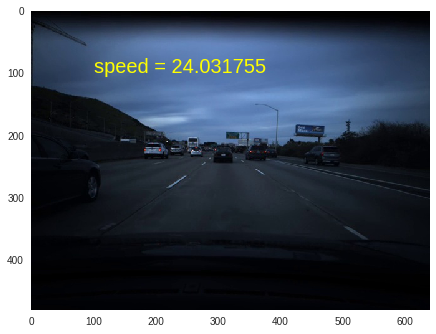

/content/data/frames/201.jpg
(480, 640, 3)


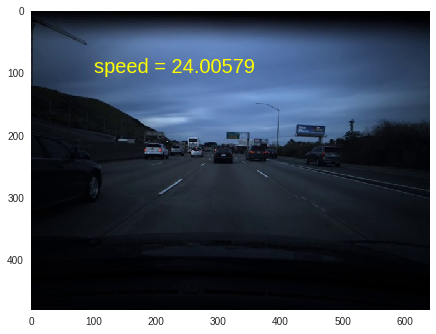

/content/data/frames/202.jpg
(480, 640, 3)


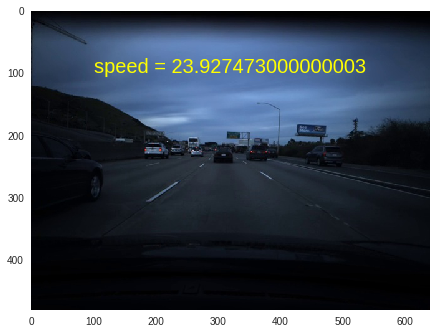

/content/data/frames/203.jpg
(480, 640, 3)


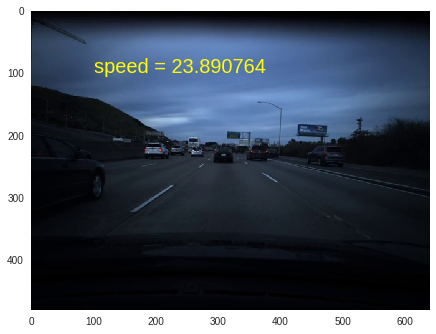

/content/data/frames/204.jpg
(480, 640, 3)


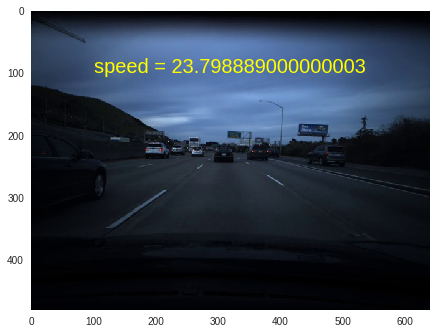

In [0]:
for i in range(200,205):
  img_path = '/content/data/frames/'+str(i)+'.jpg'
  view_img_speed(img_path)

# Raw Data to Numpy to Tensors

0 28.105569
/content/data/frames/0.jpg
(480, 640, 3)


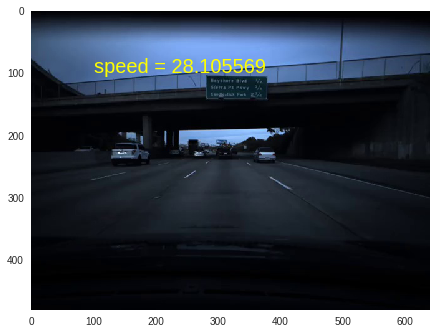

1 28.105569
/content/data/frames/1.jpg
(480, 640, 3)


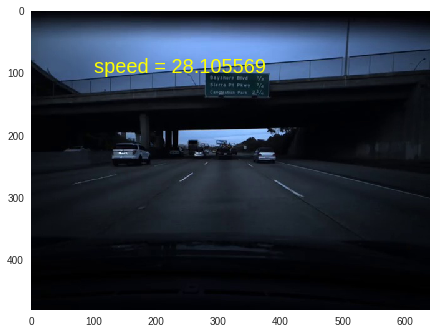

2 28.106527000000003
/content/data/frames/2.jpg
(480, 640, 3)


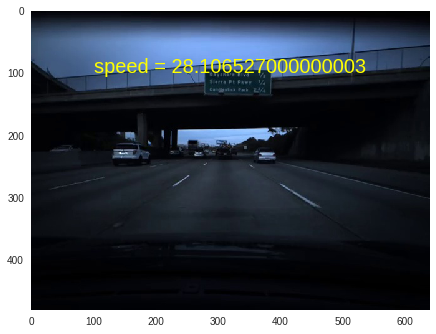

3 28.130404
/content/data/frames/3.jpg
(480, 640, 3)


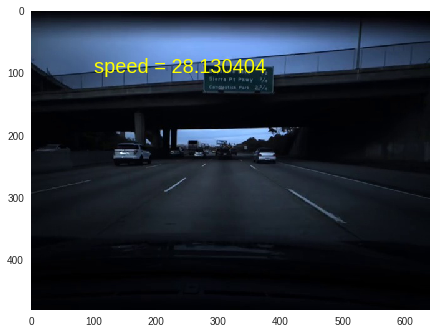

4 28.109243
/content/data/frames/4.jpg
(480, 640, 3)


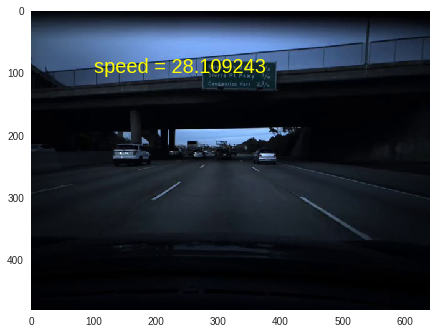

5 28.088571999999996
/content/data/frames/5.jpg
(480, 640, 3)


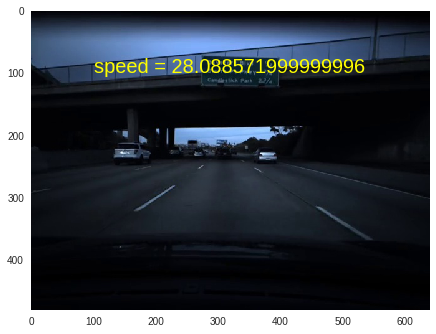

In [0]:
for i, row in data_df.iterrows():
  print(i, row[0])
  img_path = "/content/data/frames/{}.jpg".format(i)
  view_img_speed(img_path)
  if i>=5:break

In [0]:
for i, row in data_df.iterrows():
  img_path = "/content/data/frames/{}.jpg".format(i)
  

## 480 x 640 is computationally expensive(atleast for GPU i am using) and also the sky and road doesn't give much information regarding the speed.

The speed of the vehicle will be calculated by the relative distance of the vehicle form other, so its better to remove unnecessary data from the image.

I am cropping 220x220 from center which will contain most of the necessary data. Range can be increased for better performance but due to my GPU Memory , i will stick to 240x240 , will increase it if possible later.

In [0]:
from PIL import Image


# img = Image.open("/content/data/frames/1000.jpg")


# img1 = img.crop((90,150,500,370))
# # [130:350,210:450]
# plt.imshow(img)
# plt.text(100,100,'Original Image', fontsize=20, color='yellow')
# plt.grid(False)
# plt.show()

# plt.imshow(img1)
# plt.text(100,100,'Cropped Image', fontsize=20, color='yellow')
# plt.grid(False)
# plt.show()

# import numpy as np
# img2 = img1.resize((224,224), Image.ANTIALIAS)

# plt.imshow(img2)
# plt.text(100,100,'Resized Image', fontsize=20, color='yellow')
# plt.grid(False)
# plt.show()



def crop_resize_img(img):
  img = img.crop((90,150,500,370))
  img = img.resize((224,224), Image.ANTIALIAS)
  return img

0 speed = 28.105569


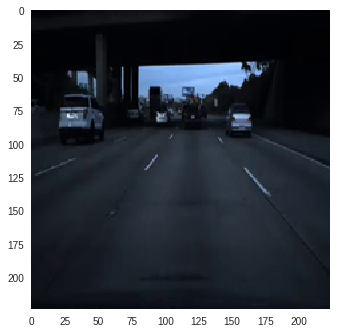

1 speed = 28.105569


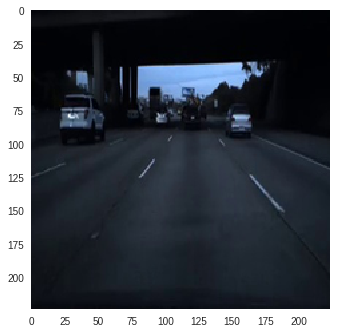

2 speed = 28.106527000000003


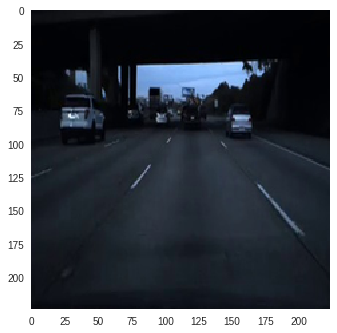

3 speed = 28.130404


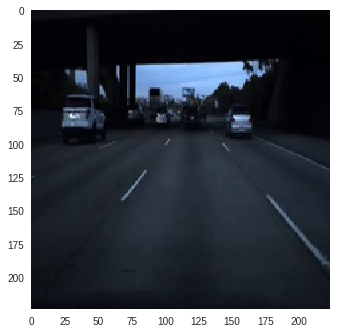

4 speed = 28.109243


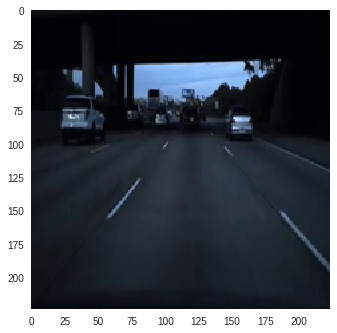

5 speed = 28.088571999999996


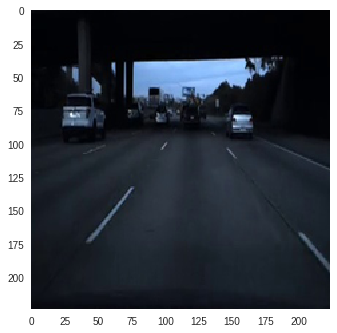

In [0]:
for i, row in data_df.iterrows():
  print(i, 'speed = {}'.format(row[0]))
  img_path = "/content/data/frames/{}.jpg".format(i)
  img = Image.open(img_path)
  final_img = crop_resize_img(img)
  plt.imshow(final_img)
  plt.grid(False)
  plt.show()
  if i>=5 :break

## PIL image to Tensors

## Standardizing labels to improve convergence

In [0]:
import torch
from PIL import Image
import numpy as np
imgs = []
labels = []

for i, row in data_df.iterrows():
  img_path = "/content/data/frames/{}.jpg".format(i)
  img = Image.open(img_path)
  img = crop_resize_img(img)
  imgs.append(np.array(img))
  labels.append(row[0])

imgs = np.array(imgs)
labels = np.array(labels)




In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(labels.reshape(-1,1))
labels = scaler.transform(labels.reshape(-1,1))
# scaler.inverse_transform(scaled_data[0].reshape(1, -1))  

In [0]:
np.min(labels)

0.0

## Train test split of data

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(imgs, labels, test_size=0.2, random_state=12)

In [0]:
%whos

Variable           Type         Data/Info
-----------------------------------------
Image              module       <module 'PIL.Image' from <...>t-packages/PIL/Image.py'>
crop_resize_img    function     <function crop_resize_img at 0x7fc8c7294268>
data_df            DataFrame                   0\n0      <...>n[20400 rows x 1 columns]
i                  int          20399
img                Image        <PIL.Image.Image image mo<...>24x224 at 0x7FC87DBB5EF0>
img_path           str          /content/data/frames/20399.jpg
imgs               ndarray      20400x224x224x3: 3070771200 elems, type `uint8`, 3070771200 bytes (2928.515625 Mb)
labels             ndarray      20400: 20400 elems, type `float64`, 163200 bytes (159.375 kb)
np                 module       <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
pd                 module       <module 'pandas' from '/u<...>ages/pandas/__init__.py'>
plt                module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
r

In [0]:
del imgs, labels 

## Numpy Array -> Tensor -> DataLoader

In [0]:
import torch.utils.data as utils
from torchvision import transforms
 

# normalize=  transforms.Compose([
#      transforms.ToPILImage(),
#      transforms.ToTensor(),
#      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
#  ])


# tensor_x = torch.from_numpy(np.array(np.rollaxis(x_train, 3, 1)))
# tensor_x = torch.stack([normalize(img) for img in tensor_x])


# tensor_xte = torch.from_numpy(np.array(np.rollaxis(x_test, 3, 1)))
# tensor_xte = torch.stack([normalize(img) for img in tensor_xte])




tensor_x = torch.from_numpy(np.rollaxis(x_train, 3, 1))
tensor_y = torch.from_numpy(y_train)
my_dataset = utils.TensorDataset(tensor_x, tensor_y)
trainloader = utils.DataLoader(my_dataset, batch_size = 1200)

tensor_xte = torch.from_numpy(np.rollaxis(x_test, 3, 1))
tensor_yte = torch.from_numpy(y_test)
my_datasette = utils.TensorDataset(tensor_xte, tensor_yte)
testloader = utils.DataLoader(my_datasette, batch_size = 500)

In [0]:
del x_test, x_train, y_test, y_train

In [0]:
tensor_x.shape

torch.Size([16320, 3, 224, 224])

## Model Tranfer Learning

In [0]:
from torchvision import models

model = models.resnet18(pretrained=True)
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
for param in model.parameters():
    param.requires_grad = False

In [0]:
for param in model.layer4[1].parameters():
    param.requires_grad = True
    
for param in model.fc.parameters():
    param.requires_grad = True    
    
for param in model.avgpool.parameters():
    param.requires_grad = True

In [0]:
# for params in model.features[6:].parameters():
#     param.requires_grad = True  

In [0]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
import torch.nn as nn

# last_layer = nn.Sequential(nn.Linear(4096, 1),nn.Tanh())
classifier = nn.Sequential(nn.Linear(512, 256),
                           nn.ReLU(),
                           nn.Dropout(0.2),
                           nn.Linear(256, 1),
                           nn.ReLU())
# model.classifier[6] = last_layer
model.fc = classifier
model.cuda()
print(model.fc)

Sequential(
  (0): Linear(in_features=512, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.2)
  (3): Linear(in_features=256, out_features=1, bias=True)
  (4): ReLU()
)


In [0]:
model(torch.randn(1,3,224,224).cuda())

tensor([[0.1769]], device='cuda:0', grad_fn=<ThresholdBackward0>)

In [0]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

## Training loop

Epoch: 1/50  Training Loss: 96.933  Test Loss: 69.640 
Validation loss decreased (inf --> 69.640221).  Saving model ...
Epoch: 2/50  Training Loss: 68.613  Test Loss: 69.023 
Validation loss decreased (69.640221 --> 69.022949).  Saving model ...
Epoch: 3/50  Training Loss: 68.127  Test Loss: 68.033 
Validation loss decreased (69.022949 --> 68.033218).  Saving model ...
Epoch: 4/50  Training Loss: 67.892  Test Loss: 68.155 
Epoch: 5/50  Training Loss: 67.820  Test Loss: 68.039 
Epoch: 6/50  Training Loss: 67.832  Test Loss: 68.035 
Epoch: 7/50  Training Loss: 67.832  Test Loss: 68.007 
Validation loss decreased (68.033218 --> 68.007042).  Saving model ...
Epoch: 8/50  Training Loss: 67.861  Test Loss: 67.983 
Validation loss decreased (68.007042 --> 67.983299).  Saving model ...
Epoch: 9/50  Training Loss: 67.862  Test Loss: 67.982 
Validation loss decreased (67.983299 --> 67.981857).  Saving model ...
Epoch: 10/50  Training Loss: 67.894  Test Loss: 68.001 
Epoch: 11/50  Training Loss: 

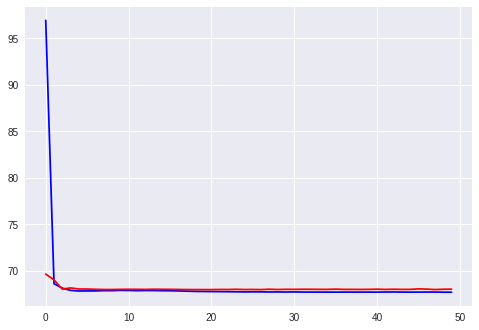

In [0]:

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
valid_loss_min = np.Inf
epochs = 50
steps = 0
# valid_loss_min = np.Inf

train_losses, test_losses = [], []
for e in range(epochs):
    running_loss = 0
    tr_accuracy = 0
    for images, labels in trainloader:
        images = (images.type(torch.FloatTensor).cuda()-128)/255
        labels = labels.type(torch.FloatTensor).cuda()
        optimizer.zero_grad()
#         print(images.type())
#         print(images)
        log_ps  = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        test_loss = 0
        accuracy = 0
        
        # Turn off gradients for validation, saves memory and computations
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = (images.type(torch.FloatTensor).cuda()-128)/255
                labels = labels.type(torch.FloatTensor).cuda()
                log_ps = model(images)
#                 print(log_ps)
                test_loss += criterion(log_ps, labels)

        
        model.train()
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))

        print("Epoch: {}/{} ".format(e+1, epochs),
              "Training Loss: {:.3f} ".format(train_losses[-1]),
              "Test Loss: {:.3f} ".format(test_losses[-1]))
        if test_loss/len(testloader) <= valid_loss_min:
          print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
          valid_loss_min,
          test_loss/len(testloader)))
          torch.save(model.state_dict(), 'best_model.pt')
          valid_loss_min = test_loss/len(testloader)
        
plt.plot(train_losses, 'b', label='Training Loss')
plt.plot(test_losses, 'r', label='Validation Loss')
plt.show()

In [0]:
with torch.no_grad():
  model.eval()
  for images, labels in testloader:
      images = (images.type(torch.FloatTensor).cuda()-128)/255
      labels = labels.type(torch.FloatTensor).cuda()
      log_ps = model(images)
      print(log_ps)
      print(labels)
      break

tensor([[12.2230],
        [12.0778],
        [12.2803],
        [12.2132],
        [12.1145],
        [12.2055],
        [12.0980],
        [12.1094],
        [12.1819],
        [12.1372],
        [12.1189],
        [12.1824],
        [12.1243],
        [12.2234],
        [12.1625],
        [12.1495],
        [12.2921],
        [12.2090],
        [12.1839],
        [12.1537],
        [12.2335],
        [12.2260],
        [12.1527],
        [12.1108],
        [12.1036],
        [12.0507],
        [12.1259],
        [12.1586],
        [12.2359],
        [12.1892],
        [12.0177],
        [12.1679],
        [12.1356],
        [12.1583],
        [12.0972],
        [12.1315],
        [12.1268],
        [12.0628],
        [12.0831],
        [12.1057],
        [12.1489],
        [12.0651],
        [12.1167],
        [12.1240],
        [12.2716],
        [12.2049],
        [12.1164],
        [12.1388],
        [12.2078],
        [12.1806],
        [12.1375],
        [12.0377],
        [12.